In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# https://www.kaggle.com/srcecde/shoppee-eda-fuzzymatch-phash-cosinesim-tfidf

In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
source_path = '../input/shopee-product-matching/'

test = pd.read_csv(source_path + 'test.csv')
train = pd.read_csv(source_path + 'train.csv')

In [8]:
train['image_path'] = train['image'].apply(lambda x: f"{source_path}/train_images/{x}")
test['image_path'] = test['image'].apply(lambda x: f"{source_path}/test_images/{x}")

# convert label_group to target
tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
train['target'] = train.label_group.map(tmp)

train

posting_id                                 image  \
0       train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg   
1      train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg   
2      train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg   
3      train_2406599165  00117e4fc239b1b641ff08340b429633.jpg   
4      train_3369186413  00136d1cf4edede0203f32f05f660588.jpg   
...                 ...                                   ...   
34245  train_4028265689  fff1c07ceefc2c970a7964cfb81981c5.jpg   
34246   train_769054909  fff401691371bdcb382a0d9075dfea6a.jpg   
34247   train_614977732  fff421b78fa7284284724baf249f522e.jpg   
34248  train_3630949769  fff51b87916dbfb6d0f8faa01bee67b8.jpg   
34249  train_1792180725  ffffa0ab2ae542357671e96254fa7167.jpg   

            image_phash                                              title  \
0      94974f937d4c2433                          Paper Bag Victoria Secret   
1      af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2      b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3      8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4      a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   
...                 ...                                                ...   
34245  e3cd72389f248f21  Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...   
34246  be86851f72e2853c    MamyPoko Pants Royal Soft - S 70 - Popok Celana   
34247  ad27f0d08c0fcbf0  KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...   
34248  e3b13bd1d896c05c  Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...   
34249  af8bc4b2d2cf9083  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...   

       label_group                                         image_path  \
0        249114794  ../input/shopee-product-matching//train_images...   
1       2937985045  ../input/shopee-product-matching//train_images...   
2       2395904891  ../input/shopee-product-matching//train_images...   
3       4093212188  ../input/shopee-product-matching//train_images...   
4       3648931069  ../input/shopee-product-matching//train_images...   
...            ...                                                ...   
34245   3776555725  ../input/shopee-product-matching//train_images...   
34246   2736479533  ../input/shopee-product-matching//train_images...   
34247   4101248785  ../input/shopee-product-matching//train_images...   
34248   1663538013  ../input/shopee-product-matching//train_images...   
34249    459464107  ../input/shopee-product-matching//train_images...   

                                                  target  
0                    [train_129225211, train_2278313361]  
1                   [train_3386243561, train_3423213080]  
2                   [train_2288590299, train_3803689425]  
3                   [train_2406599165, train_3342059966]  
4                    [train_3369186413, train_921438619]  
...                                                  ...  
34245               [train_2829161572, train_4028265689]  
34246                [train_1463059254, train_769054909]  
34247  [train_4126022211, train_3926241003, train_232...  
34248  [train_3419392575, train_1431563868, train_363...  
34249                [train_795128312, train_1792180725]  

[34250 rows x 7 columns]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
 5   image_path   34250 non-null  object
 6   target       34250 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [10]:
test

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  \
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...   
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...   
2   READY Lemonilo Mie instant sehat kuah dan goreng   

                                          image_path  
0  ../input/shopee-product-matching//test_images/...  
1  ../input/shopee-product-matching//test_images/...  
2  ../input/shopee-product-matching//test_images/...

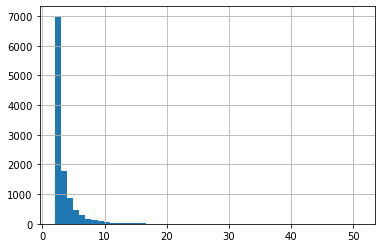

In [11]:
# theres in avg 3 similar images (up to 51)
train['label_group'].value_counts().hist(bins=50);

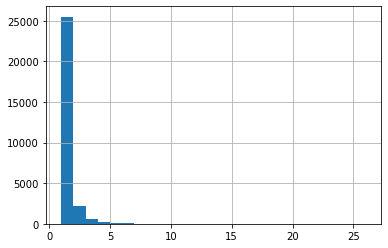

In [12]:
# most images are unique but there's also some duplicates (same phash)
# similar perceptual hashes also means the images are similar
train['image_phash'].value_counts().hist(bins=25);

In [13]:
def plot_images(dataframe, column_name, value):
    '''
    Plot images using image_path, based on the column & value filter
    '''
    plt.figure(figsize = (30, 30))
    value_filter = dataframe[dataframe[column_name] == value]
    image_paths = value_filter['image_path'].to_list()
    print(f'Total images: {len(image_paths)}')
    posting_id = dataframe['posting_id'].to_list()
    for i, j in enumerate(zip(image_paths, posting_id)):
        plt.subplot(10, 10, i + 1)
        img = cv2.cvtColor(cv2.imread(j[0]), cv2.COLOR_BGR2RGB)
        plt.title(j[1])
        plt.axis("off")
        plt.tight_layout()
        plt.imshow(img)

Total images: 16


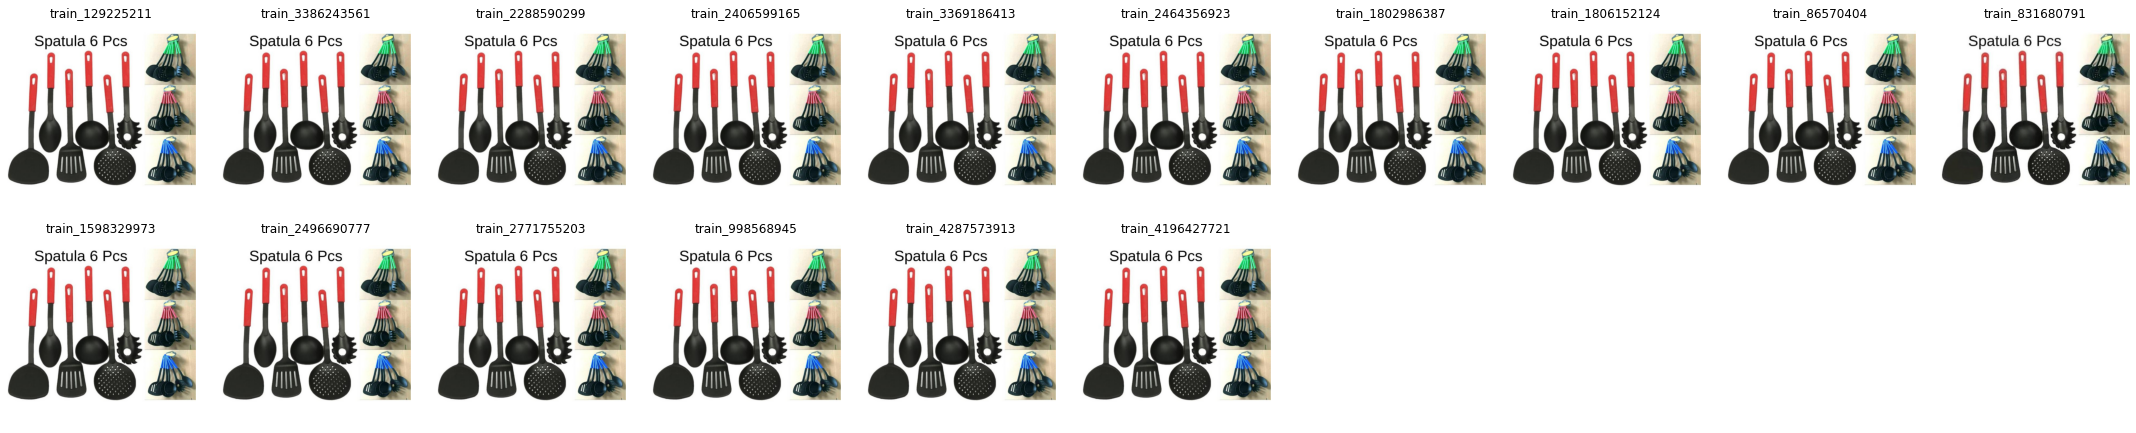

In [14]:
# examples of identical phash
# fad28daa2ad05595, d0c0ea37bd9acce0, be12e12f9ec1e198, f6d98134b904b56b, e992966d4ba49761

label = 'f6d98134b904b56b'
plot_images(train, 'image_phash', label)

Total images: 51


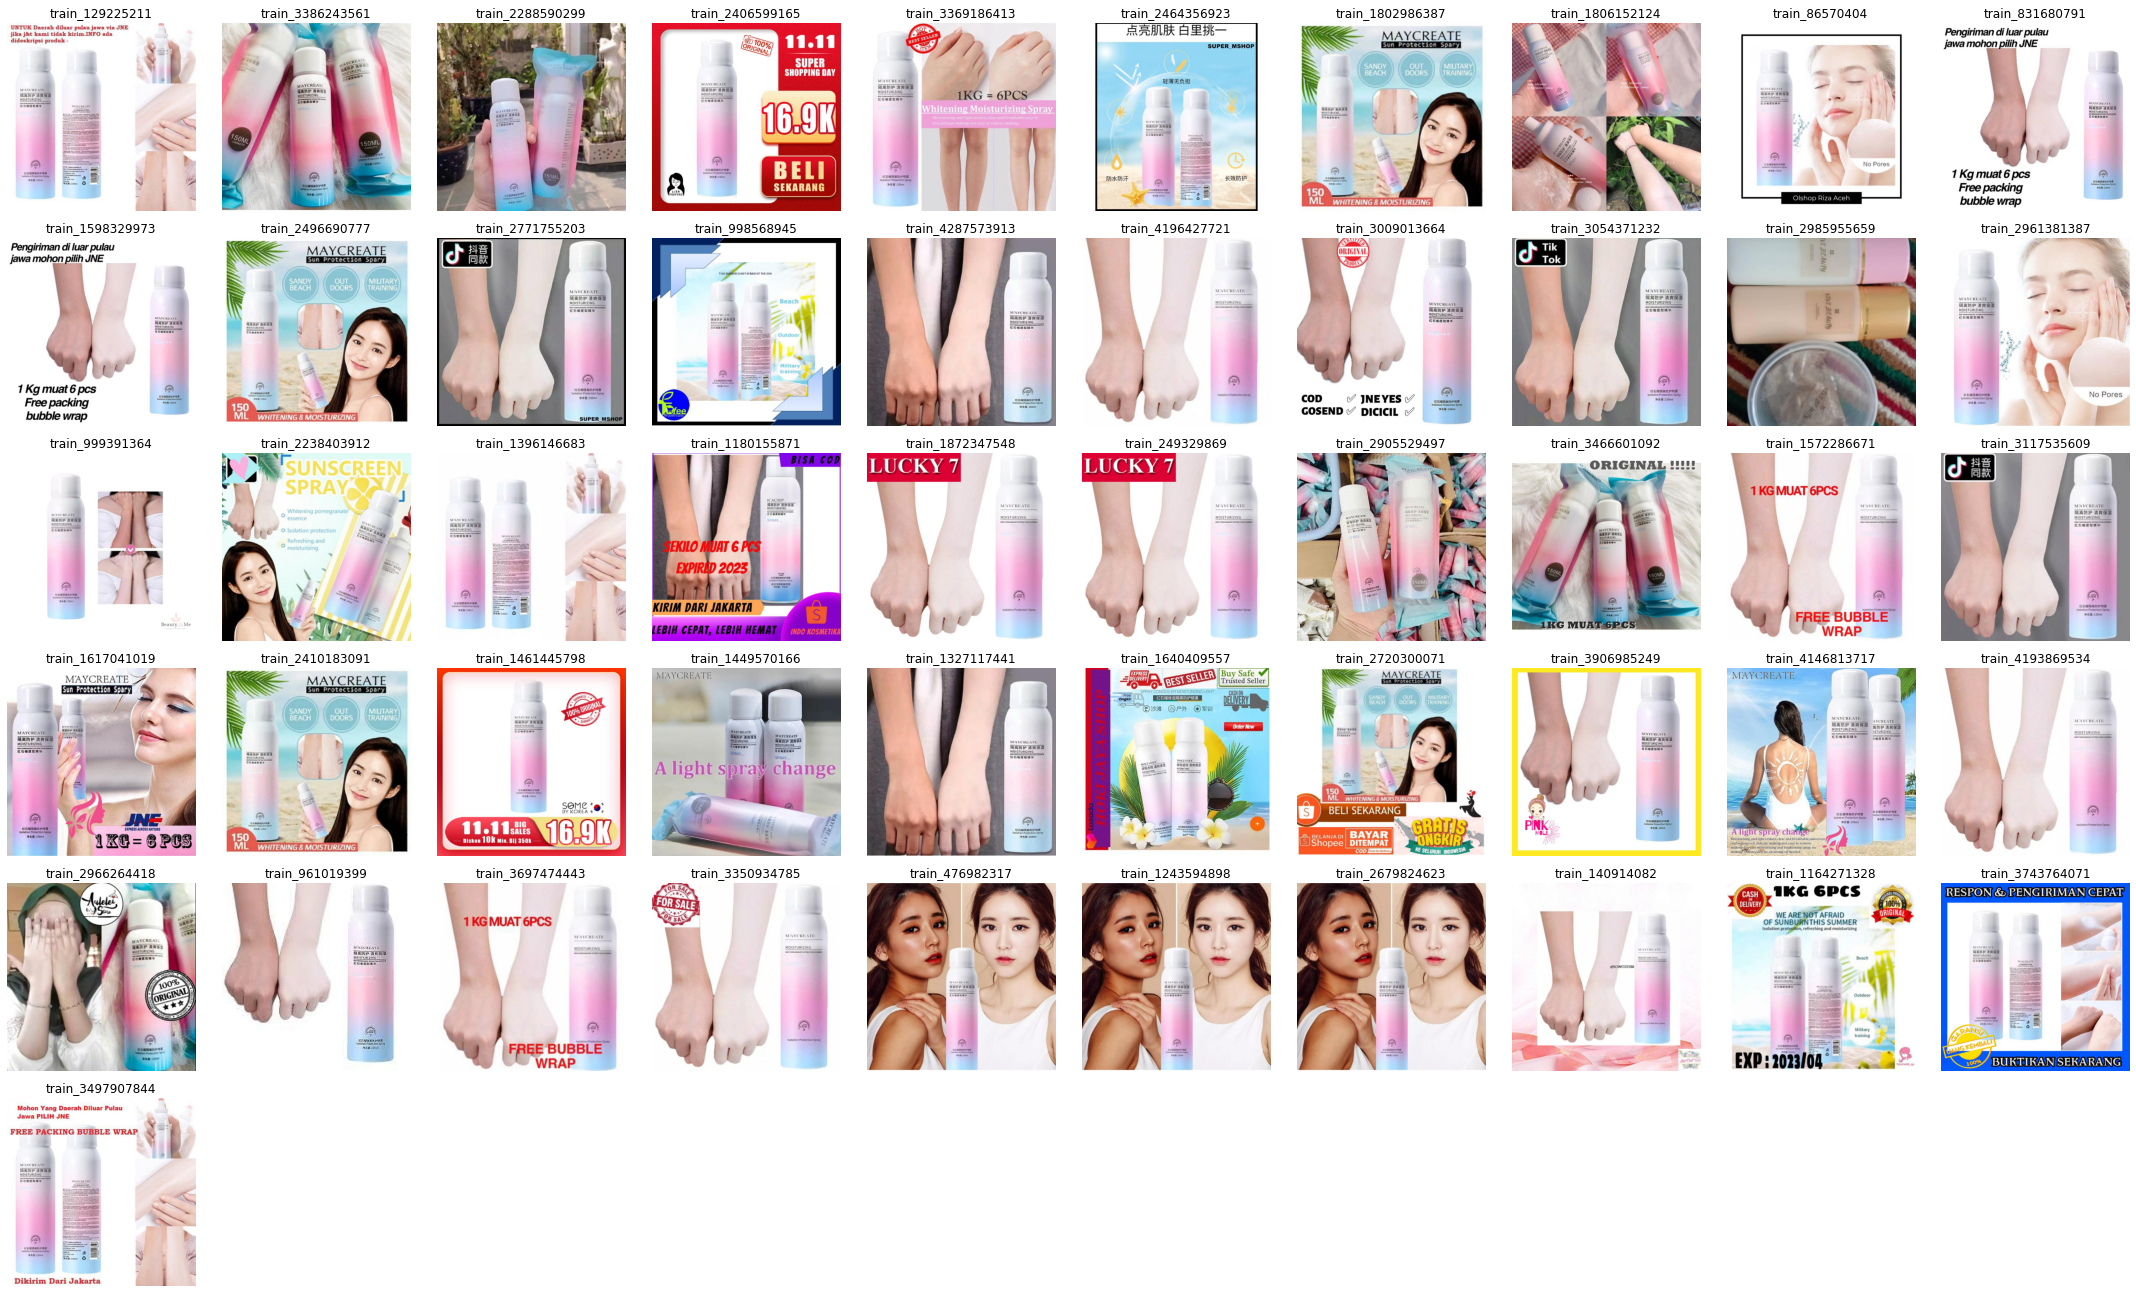

In [15]:
# examples of similar images (based on their label_group)
# 3627744656, 1163569239, 994676122, 3113678103, 1141798720

label = 1141798720
plot_images(train, 'label_group', label)

In [16]:
# similar titles (for the same label_group)
train['title'][train['label_group'] == 1141798720]

50       ARSHOP MAYCREATE MOISTURIZING UV SPRAY 150ML (...
85       \xe2\x9d\xa4 RATU \xe2\x9d\xa4 MAYCREATE MOIST...
97       MAYCREATE MOISTURIZING LOTION/WHITENING SUNSCR...
2154     Jakarta Maycreate Moisturizing Spray Melembabk...
3656     MAYCREATE LOTION SPRAY 150ML - Maycreat isolat...
3882                  ISOLATION WHITENING PROTECTION SPRAY
3908     MAYCREATE LOTION SPRAY 150ML - Maycreat isolat...
6190         ORIGINAL 100% Maycreate Whitening Spray SPF50
6361     MY CREATE SPRAY PEMUTIH VIRAL TIKTOK LOTION KOREA
6515        MAYCREATE MOISTURIZING SPRAY 150ML / kimberlin
6516           MAYCREATE MOISTURIZING SPRAY 150ML zoomstar
7408                                             Maycreate
8116                             Maycreate isolation spray
8420     [IMPORT] - Maycreate Isolation Protection Spra...
10905    b"M'AYCREATE MOUSTURIZING PROTECTION SPRAY /PE...
11737    MAYCREATE MOISTURIZING LOTION/WHITENING SUNSCR...
11921    maycreate instant  ORIGINAL whitening spray / .

## phash matching

In [17]:
# group identical phash
tmp = train.groupby('image_phash').posting_id.agg('unique').to_dict()
train['pred_phash'] = train.image_phash.map(tmp)
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                          image_path  \
0  ../input/shopee-product-matching//train_images...   
1  ../input/shopee-product-matching//train_images...   
2  ../input/shopee-product-matching//train_images...   
3  ../input/shopee-product-matching//train_images...   
4  ../input/shopee-product-matching//train_images...   

                                 target          pred_phash  
0   [train_129225211, train_2278313361]   [train_129225211]  
1  [train_3386243561, train_3423213080]  [train_3386243561]  
2  [train_2288590299, train_3803689425]  [train_2288590299]  
3  [train_2406599165, train_3342059966]  [train_2406599165]  
4   [train_3369186413, train_921438619]  [train_3369186413]

In [18]:
# group similar phash

def hamming_distance(hash1, hash2):
    "Calculates hamming distance between two hashes"    
    return sum([c1 != c2 for c1, c2 in zip(hash1, hash2)])

'''
# very long to run
train['pred_phash_dist'] = np.nan
for i in range(train.shape[0]):
    train['dist'] = train['image_phash'].apply(lambda x: hamming_distance(x,train['image_phash'].iloc[i]))
    train['pred_phash_dist'].iloc[i] =  [x for x in train['posting_id'].loc[train['dist'] < 6]]
'''

"\n# very long to run\ntrain['pred_phash_dist'] = np.nan\nfor i in range(train.shape[0]):\n    train['dist'] = train['image_phash'].apply(lambda x: hamming_distance(x,train['image_phash'].iloc[i]))\n    train['pred_phash_dist'].iloc[i] =  [x for x in train['posting_id'].loc[train['dist'] < 6]]\n"

In [19]:
##train.to_csv(source_path + 'pred.csv', index=False)

In [20]:
# f1 score
def getMetric(col):
    def f1score(row):
        n = len( np.intersect1d(row.target,row[col]) )
        return 2*n / (len(row.target)+len(row[col]))
    return f1score

In [21]:
print("f1 score for identical phash :", round(train.apply(getMetric('pred_phash'),axis=1).mean(), 3))
#print("f1 score for similar phash :", round(train.apply(getMetric('pred_phash_dist'),axis=1).mean(), 3))

f1 score for identical phash : 0.553


## Features matching with OpenCV

In [22]:
# Get sample of similar images
tmp = train[train['label_group'] == 1141798720]
tmp

posting_id                                 image  \
50     train_3497907844  007be583a5a4edc3fc54b0779e141a9f.jpg   
85     train_4175229751  00b9f86046a30f68841671d510077cc6.jpg   
97     train_2930186018  00d368b4331f37573f69d083f4437f0d.jpg   
2154    train_515008716  108d7bbca23a3650bcbc2a77857c5c5f.jpg   
3656   train_1354360830  1bfeae8d7713be68d785b8e2ff7dd93c.jpg   
3882    train_516663932  1d89e95c4de0a09d726e5068810628a3.jpg   
3908   train_2677100375  1dae7c73bc6f88e8002fb597c01cecfa.jpg   
6190   train_3480877149  2eedfbe10ba240a1c1cf74aa49b0d7ac.jpg   
6361   train_2041937727  30305306349deae2aceeb8e28e981307.jpg   
6515   train_1699906038  315c5722ace57a8aba433ddd29f4d644.jpg   
6516   train_3534764813  315c5722ace57a8aba433ddd29f4d644.jpg   
7408    train_664339299  381070f92bff1a9e131802c093e06ca6.jpg   
8116   train_1296711926  3d3f6a96bcf25d53ecae7618cafdac72.jpg   
8420   train_1591104350  3f41ffc681c3069c0b56eb06f394d803.jpg   
10905  train_2918032299  51e5fd87322482a6318142f09073b5d9.jpg   
11737  train_2531777612  583effbcdeffc968a2e69c7b3f0b67bc.jpg   
11921  train_3731734583  59d27a721a092768ed3d293470389050.jpg   
12337  train_1086903685  5cd5f1866e4da043e5ba10a01343b5e3.jpg   
12517   train_658862317  5e207c624ee4d3365b4b43beee1437f8.jpg   
12698  train_2123729460  5f892c31c46638bde54d370a0d37c08f.jpg   
12762  train_2708192355  600bb1bad88a448a9e57237c7347827b.jpg   
13349  train_3454652975  648a47bb79a64970d6143c9968781938.jpg   
13644  train_1913449144  66da58f62547696c906051deee5759a2.jpg   
13651  train_1540761220  66e99216f4c3925a331d98f99493493c.jpg   
14579  train_3195325438  6dc12f93d9989b40937b1bcc477360e6.jpg   
14580   train_365461299  6dc12f93d9989b40937b1bcc477360e6.jpg   
14655  train_4060693827  6e5e87b82b0b484f7739f83a0de654f5.jpg   
16546  train_2664816648  7c9eb4103f42746482b1e42d0ab5b3e3.jpg   
19112  train_3332324456  90196ca21abe4701aca7716e89bf69f8.jpg   
19301  train_1850201761  917956ce6ddbad7088efc58c2bf2e33e.jpg   
20055  train_3956550694  96900b9d2ed7d5ab30c004307ac12ac5.jpg   
21719  train_1799291694  a32d8c72784a1a21d6ef4ebf6f55eef0.jpg   
22316  train_3178715139  a78588044af25c96e0b80c037dfee4bf.jpg   
25056  train_2230152472  bb6569171e12e1a9983545686df3e546.jpg   
25206  train_3945800827  bc9392cb2e4b8e5a5dfa7407339faabd.jpg   
25298  train_2789820394  bd523b18dffe2ab684b6bb1ca65c1baa.jpg   
27830  train_4003658555  d038c83eb29422e3b4d91e2838db53d6.jpg   
28168   train_240158006  d2c1da48122a409d2a555763872a95f4.jpg   
28428  train_2497676427  d49513b5d5fc8fb90af0a251e36a4dfd.jpg   
28476  train_1943472851  d4f369d8f66ab4ced04159cb08abd936.jpg   
29226   train_711042017  db0e7e5fe0acfed1e71b1614286c0207.jpg   
29323  train_2146279151  dbb3acc284ca23cbcecac9c60d79cca9.jpg   
29493  train_2813067780  dcf5dba5bfe1f44e3551230030f4c712.jpg   
31030   train_846192553  e88a894bf35cb286b8a773f28866a477.jpg   
32300   train_627475146  f2195976cc6379e4eb07f62bad3bb667.jpg   
32301  train_3366673512  f2195976cc6379e4eb07f62bad3bb667.jpg   
32302  train_4199111972  f2195976cc6379e4eb07f62bad3bb667.jpg   
33027  train_2114123891  f73cc9f71340603e294bdc6d8fea74ea.jpg   
33533  train_4178955354  fabc156cb747154ec2e5b52b6017ceef.jpg   
33806   train_112182868  fcbfbdb596fd53607b8dc9de8f108365.jpg   
34235  train_3668806308  ffdd054398884b04bdab9e41d30c7fb2.jpg   

            image_phash                                              title  \
50     9ba6cc31a427a675  ARSHOP MAYCREATE MOISTURIZING UV SPRAY 150ML (...   
85     a9b6c30b36f03b49  \xe2\x9d\xa4 RATU \xe2\x9d\xa4 MAYCREATE MOIST...   
97     8a3bf044fe46d2d4  MAYCREATE MOISTURIZING LOTION/WHITENING SUNSCR...   
2154   c0b34f6e26345b0f  Jakarta Maycreate Moisturizing Spray Melembabk...   
3656   f6b8b81e988be286  MAYCREATE LOTION SPRAY 150ML - Maycreat isolat...   
3882   ef4870b519e52731               ISOLATION WHITENING PROTECTION SPRAY   
3908   d4ab26559f4a9394  MAYCREATE LOTION SPRAY 150ML - Maycreat isolat...   
6190   a

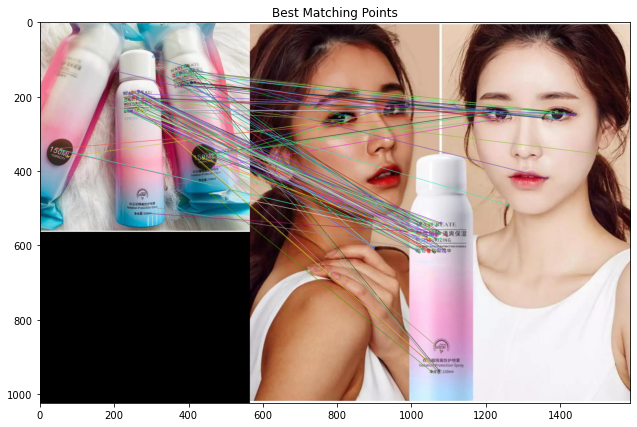


Number of Matching Keypoints Between The Training and Query Images:  108


In [99]:
# Use ORB for key points matching

source_img = tmp['image_path'].iloc[1]
current_img = tmp['image_path'].iloc[45]

train = cv2.cvtColor(cv2.imread(source_img), cv2.COLOR_BGR2RGB)
train_gray = cv2.cvtColor(train, cv2.COLOR_RGB2GRAY)
test = cv2.cvtColor(cv2.imread(current_img), cv2.COLOR_BGR2RGB)
test_gray = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()

train_kp, train_des = orb.detectAndCompute(train_gray, None)
test_kp, test_des = orb.detectAndCompute(test_gray, None)

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_des, test_des)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(train, train_kp, test, test_kp, matches, test, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [76]:
# Define how similar they are
number_keypoints = 0
if len(train_kp) <= len(test_kp):
    number_keypoints = len(train_kp)
else:
    number_keypoints = len(test_kp)
    
len(matches) / number_keypoints

0.216